## Step 1: Import Libraries

In [49]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Step 2: Load Dataset

In [50]:
from tensorflow.keras.datasets import mnist

In [51]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Step 3: Data Visualization

In [52]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


5


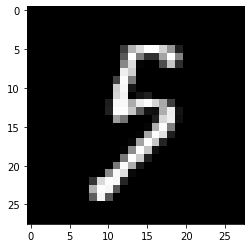

In [53]:
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap = 'gray')
print(y_train[i])

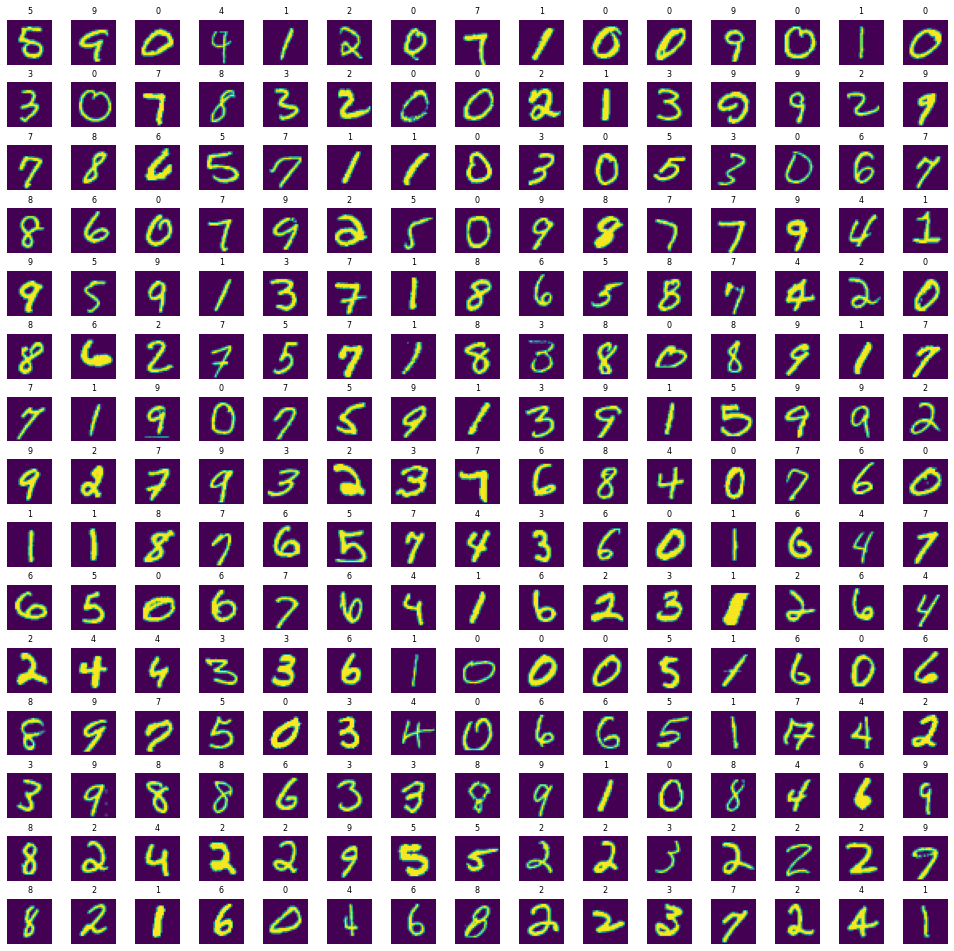

In [54]:
# Grid = 15x15 images
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15x15 matrix into 225 array
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

## Step 4: Get noice to the dataset

In [55]:
# Normalization
X_train = X_train / 255
X_test = X_test / 255

In [56]:
added_noise = np.random.randn(*(28,28))
added_noise.shape

(28, 28)

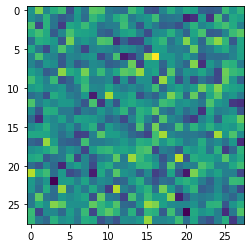

In [57]:
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))
plt.imshow(added_noise)

1.7154065758534291
-1.005104468088687


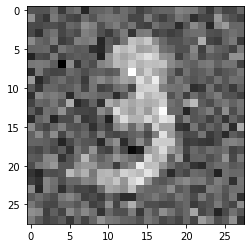

In [58]:
# add noise to a sample image
noise_factor = 0.3
sample_image = X_train[10]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(28,28))

plt.imshow(noisy_sample_image, cmap = 'gray')

print(noisy_sample_image.max())
print(noisy_sample_image.min())

1.0
0.0


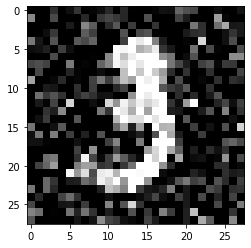

In [59]:
noisy_sample_image = np.clip(noisy_sample_image, 0., 1.)

plt.imshow(noisy_sample_image, cmap = 'gray')

print(noisy_sample_image.max())
print(noisy_sample_image.min())

In [60]:
# add noise to every single training data
X_train_noisy = []
noise_factor = 0.4

for sample_image in X_train:
    sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
    sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
    X_train_noisy.append(sample_image_noisy)

In [61]:
# convert from list to array
X_train_noisy = np.array(X_train_noisy)
X_train_noisy.shape

(60000, 28, 28)

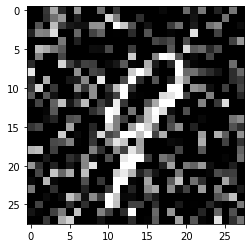

In [62]:
plt.imshow(X_train_noisy[22], cmap = 'gray')

In [63]:
# add noise to every single test data
X_test_noisy = []
noise_factor = 0.4

for sample_image in X_test:
    sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
    sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
    X_test_noisy.append(sample_image_noisy)

X_test_noisy = np.array(X_test_noisy)
X_test_noisy.shape

(10000, 28, 28)

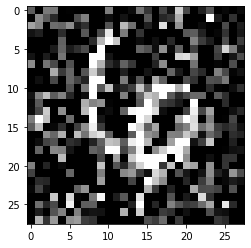

In [64]:
plt.imshow(X_test_noisy[22], cmap = 'gray')

## Step 5: Build and Train the Autoencoder Deep Learning Model

In [65]:
autoencoder = tf.keras.models.Sequential()

# Encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

# Encoded image (code layer, bottleneck)
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))

# Decoder CNN
autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8, (3,3), strides=1, padding='same'))

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, activation='sigmoid', padding='same'))


In [66]:
autoencoder.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 8)        

In [67]:
autoencoder.fit(X_train_noisy.reshape(-1,28,28,1), X_train.reshape(-1,28,28,1), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 15s 51ms/step - loss: 0.2203
Epoch 2/10
300/300 [==============================] - 15s 50ms/step - loss: 0.1278
Epoch 3/10
300/300 [==============================] - 16s 52ms/step - loss: 0.1207
Epoch 4/10
300/300 [==============================] - 16s 52ms/step - loss: 0.1175
Epoch 5/10
300/300 [==============================] - 16s 53ms/step - loss: 0.1155
Epoch 6/10
300/300 [==============================] - 16s 53ms/step - loss: 0.1140
Epoch 7/10
300/300 [==============================] - 15s 51ms/step - loss: 0.1128
Epoch 8/10
300/300 [==============================] - 15s 51ms/step - loss: 0.1118
Epoch 9/10
300/300 [==============================] - 15s 51ms/step - loss: 0.1110
Epoch 10/10
300/300 [==============================] - 16s 53ms/step - loss: 0.1102


## Step 5: Evaluate the Model

In [68]:
# Overview Stride
# W = 28, F = 3, S = 1, Padding = same
# 0 = (W-F+2*P/S) + 1 = (28-3+2*1)/1 +1 = 28

'''autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', input_shape=(28,28,1)))
autoencoder.summary()'''

"autoencoder = tf.keras.models.Sequential()\nautoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', input_shape=(28,28,1)))\nautoencoder.summary()"

In [69]:
# Overview Stride
# W = 28, F = 3, S = 2, Padding = same
# 0 = (W-F+2*P/S) + 1 = (28-3+2*1)/2 +1 = 14

'''autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding='same', input_shape=(28,28,1)))
autoencoder.summary()'''

"autoencoder = tf.keras.models.Sequential()\nautoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding='same', input_shape=(28,28,1)))\nautoencoder.summary()"

In [70]:
# Evaluate
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1,28,28,1))
denoised_images.shape

(15, 28, 28, 1)

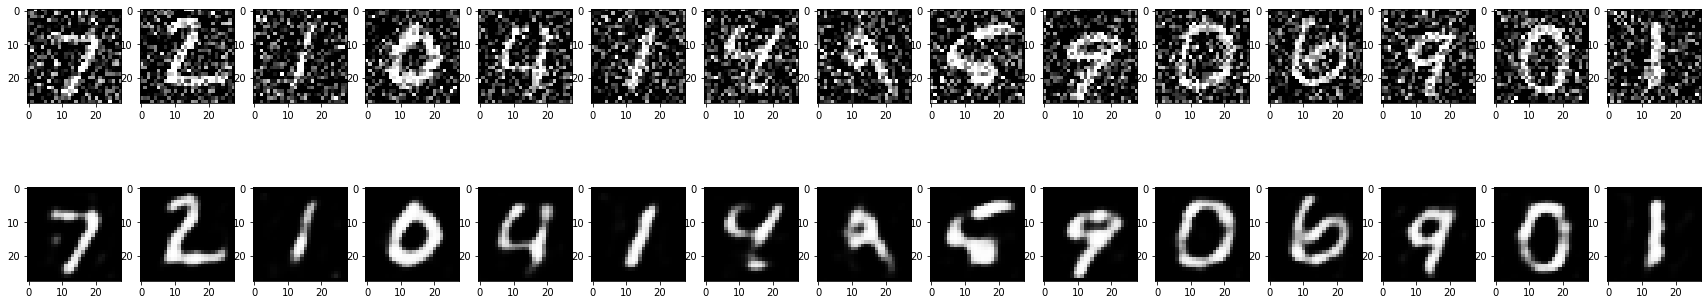

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)), cmap='gray')